In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns



## Reading my datasets using pandas

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## checking the shape of my dataset

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Having 891 rows and 12 columns

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## performing some statistical analysis and getting the (mean,medain,mode,std  etc)

##  A) Performing some EDA(Exploratory Data Analysis)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Checking missing values in my datasets
# 1) The age column has 177 missing values
# 2) The Cabin has 687 missing values
# 3) The Embarked has 2 missing values

<AxesSubplot:>

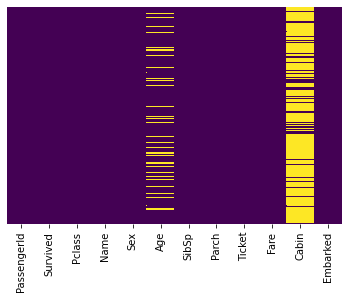

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# visualizing the misssing values using seaborn(heatmap)

<AxesSubplot:xlabel='Survived', ylabel='count'>

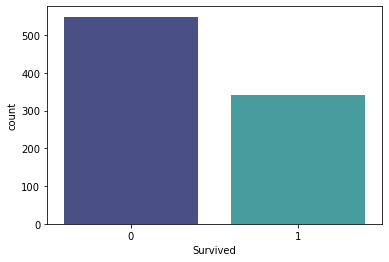

In [8]:
sns.countplot(x="Survived",data=df,palette="mako")

In [9]:
sur=df[df["Survived"]==1]
dea=df[df["Survived"]==0]

In [10]:
print(sur.shape,dea.shape)

(342, 12) (549, 12)


In [11]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# The number of people who Survived(0) are less than the poeple who did not survived(1)

<AxesSubplot:xlabel='Sex', ylabel='count'>

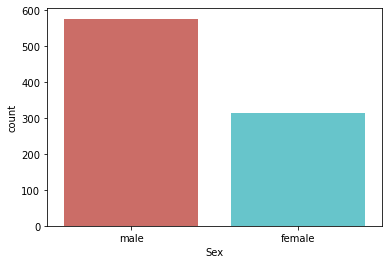

In [12]:
sns.countplot(x="Sex",data=df,palette="hls")

In [13]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

# The number of male(577) are greater than the number of female(314)

<AxesSubplot:xlabel='Survived', ylabel='count'>

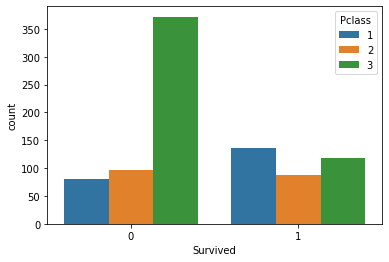

In [14]:
sns.countplot(x="Survived",hue="Pclass",data=df)

# People who survived and those who do not survived with respect to the passenger class
# 1) The Pclass==3 are the people who recorded the heighest dead followed by pclass==2 and then pcalss==1
# 2) The pclass==1 are the poeple who recorded the high number of survived,follow by pclass==3 and then pclass==2


<AxesSubplot:xlabel='SibSp', ylabel='count'>

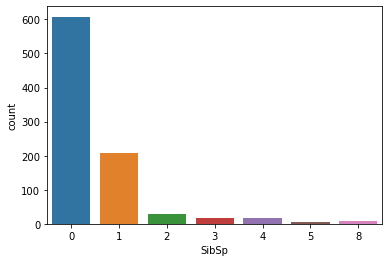

In [15]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

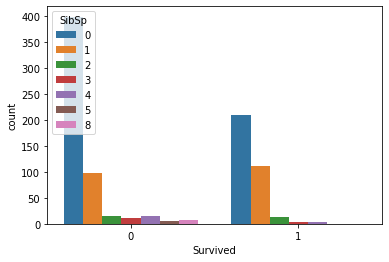

In [16]:
sns.countplot(x="Survived",data=df,hue="SibSp")

## People who survived with repect to the SibSp 

<AxesSubplot:xlabel='Parch', ylabel='count'>

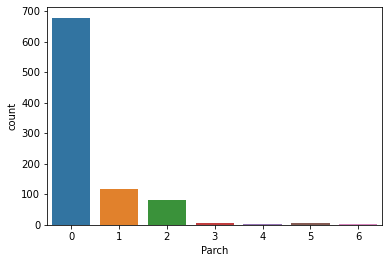

In [17]:
sns.countplot(x="Parch",data=df)

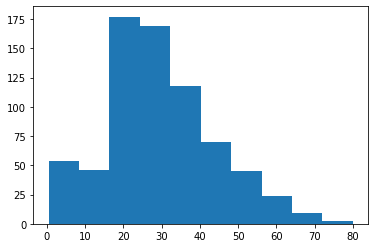

In [18]:
plt.hist(df.Age)
plt.show()

# Ploting the age distribution using a histogram

# B) Preprocessing the data

In [19]:
df["Age"]=df["Age"].fillna(df.Age).mean()

# Filling the missing value in the Age columns with the mean value

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,29.699118,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,29.699118,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,29.699118,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29.699118,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,29.699118,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

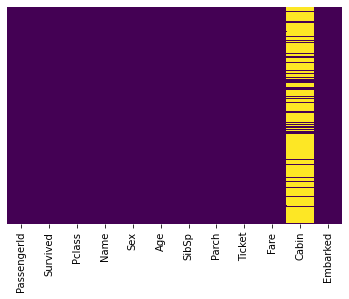

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# After filling it with the mean value, we can see that they are no more missing value in the Age column

## We the Cabine column we can see that, there are alot of Missing Value, so the only way to deal with it is drop the column from the dataset

In [22]:
df.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

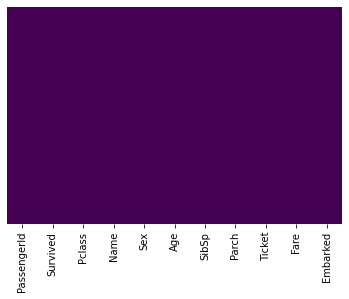

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

## After droping the Cabin column from our dataset,we can see that there are no more missing value in our dataset

## C) Handlng categorical in the dataset(Sex,Embarked)

In [24]:
cate1=pd.get_dummies(df["Sex"],drop_first=True)
cate2=pd.get_dummies(df["Embarked"],drop_first=True)

In [25]:
df1=pd.concat([df,cate1,cate2],axis=1)

In [26]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,29.699118,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,29.699118,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,29.699118,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29.699118,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,29.699118,0,0,373450,8.0500,S,1,0,1


In [27]:
df1.drop(["Sex","Name","Ticket","Embarked"],axis=1,inplace=True)

In [28]:
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,29.699118,1,0,7.2500,1,0,1
1,2,1,1,29.699118,1,0,71.2833,0,0,0
2,3,1,3,29.699118,0,0,7.9250,0,0,1
3,4,1,1,29.699118,1,0,53.1000,0,0,1
4,5,0,3,29.699118,0,0,8.0500,1,0,1


In [29]:
df1.rename({"male":"Sex","Q":"Embarked_Q","S":"Embarked_S"},axis=1,inplace=True)

In [30]:
df1.drop("PassengerId",axis=1,inplace=True)

In [31]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,0,3,29.699118,1,0,7.2500,1,0,1
1,1,1,29.699118,1,0,71.2833,0,0,0
2,1,3,29.699118,0,0,7.9250,0,0,1
3,1,1,29.699118,1,0,53.1000,0,0,1
4,0,3,29.699118,0,0,8.0500,1,0,1


# Spliting the data into dependent and independent

In [32]:
x=df1.drop("Survived",axis=1)
y=df1["Survived"]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [34]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
model.score(X_train,y_train)

0.797752808988764

In [36]:
model.score(X_test,y_test)

0.7988826815642458

In [37]:
model1=SVC()
model1.fit(X_train,y_train)

SVC()

In [38]:
model1.score(X_train,y_train)

0.6587078651685393

In [39]:
model1.score(X_test,y_test)

0.7094972067039106

In [40]:
y_pred=model.predict(X_test)

In [41]:
cm=confusion_matrix(y_test,y_pred)


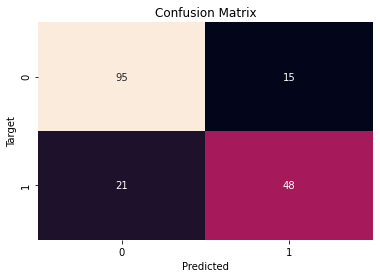

In [42]:
sns.heatmap(cm,annot=True,cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Target")
plt.show()